# Numerical Recipes Workshop 2

For the week of 2 October to 6 October, 2023

**Please submit your notebook via Noteable by Friday, 6 October by 6:00pm BST.**

*Before submitting, clear the output by clicking Restart & Clear Output from the Kernel menu*

### Learning Objectives
- Working with complex numbers
- Matrix operations
- Matrix solving
- Computing eigenvalues and eigenvectors
- Discretizing differential equations
- Principal Component Analysis

**Note, wherever you see `raise NotImplementedError()`, you should delete that line and put your code there.**

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Complex Numbers

Complex numbers of the form $a + bi$ (where $i = \sqrt{-1}$) are natively supported by the `complex` type in Python. Complex numbers can be expressed just as above, only with the letter $j$ substituted for $i$. Try the following below:

```
x = 5 + 4j
print (x)
print (type(x))
```

In [3]:
# YOUR CODE HERE
x = 5 + 4j
print(x)
print(type(x))

(5+4j)
<class 'complex'>


The `complex` type has attributes, `real` and `imag`, to access the real and imaginary components. It also has a `conjugate` class method to compute the complex conjugate. Below, print out the real and imaginary components of `x` and its complex conjugate.

Hint, for an object `x`, an attribute `y` is accessed as `x.y` and a method `z` is accessed (or called, to be exact) as `x.z()`.

In [5]:
# YOUR CODE HERE
print(x.real)
print(x.imag)

5.0
4.0


### Complex Arrays

NumPy also has support for arrays of complex numbers. A complex array can be created in a very similar way. Try the following below. Note that it is not enough to say `j*np.array(...)`. One must use `1j`.

```
x = np.arange(10) + 1j*np.arange(10)
```

The `conjugate` method can be used to compute the complex conjugate of the array. The array also has `real` and `imag` attributes. Arithmetic operations on complex arrays work the same as normal numeric arrays. Create the complex array above and print out its real component, imaginary component, and complex conjugate.

In [7]:
# YOUR CODE HERE
x = np.arange(10) + 1j*np.arange(10)
x

array([0.+0.j, 1.+1.j, 2.+2.j, 3.+3.j, 4.+4.j, 5.+5.j, 6.+6.j, 7.+7.j,
       8.+8.j, 9.+9.j])

Remember in math class (Americans just call it "math", not "maths") when they told you that $e^{i \omega t} = \cos{\omega t} + i \sin{\omega t}$ and you were like, "Come on, no way!" Well, now's your chance to prove it to yourself (or prove those math teachers wrong once and for all).

In the cell below, make a plot of the real and imaginary components of $f(t) = e^{i \omega t}$, where $\omega = 1$, over the range $t = 0$ to $4\pi$. Add axes labels and a legend. Tip: numpy comes with various mathematical constants, e.g., `np.pi`.

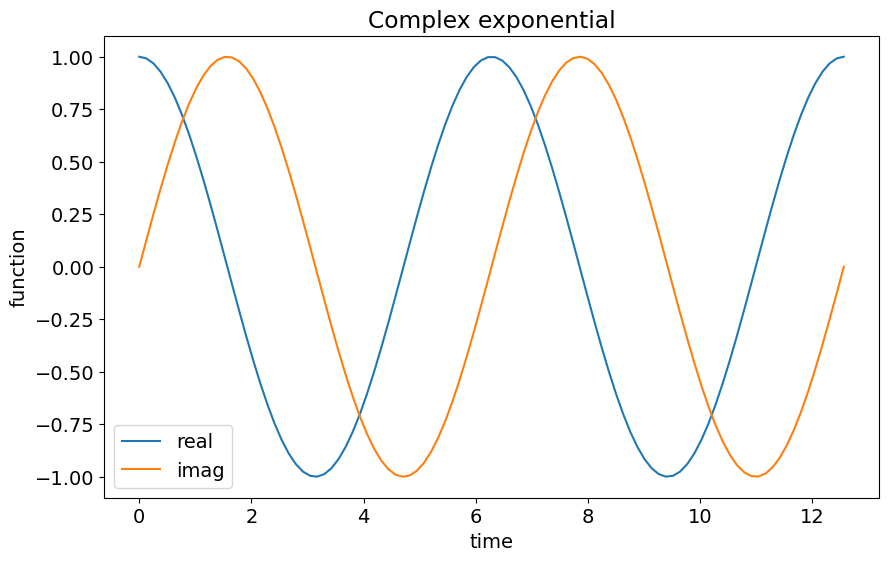

In [11]:
# YOUR CODE HERE
omega = 1
time_axis = np.linspace(0, 4*np.pi, 100)
function = np.exp(1j*omega*time_axis)
plt.plot(time_axis, function.real, label='real')
plt.plot(time_axis, function.imag, label='imag')
plt.legend()
plt.xlabel('time')
plt.ylabel('function')
plt.title('Complex exponential')
plt.show()

##  Working with Matrices

The recommended way to work with matrices is to define them as regular NumPy arrays. Multidimensional arrays come with built-in functions for doing things like transposes, matrix multiplication, and getting values along the diagonal.

In the cell below, we make two 5x5 arrays, a and b, filled with random values. Use them to try out the following operations:
- get the transpose of an array by accessing its `T` attribute.
- print the values along the diagonal using the `diagonal` method.
- perform the matrix multiplication of $a \times b$ using the `@` operator (i.e., `a @ b`). Alternatively, one can do `np.dot(a, b)`. Compare this to what you get when you simply do `a * b`.

**Note, your random values will be different from those of your neighbors.**

In [14]:
N = 5
a = np.random.random((N, N))
b = np.random.random((N, N))
# YOUR CODE HERE
print(a.T)
print(np.diag(a))
print(a@b)
print(a * b)

[[0.59206085 0.66386486 0.66679735 0.82409201 0.97054694]
 [0.27980172 0.84642738 0.55534223 0.14069289 0.66780661]
 [0.99506864 0.88249395 0.19751987 0.33227327 0.38626833]
 [0.32818339 0.34798325 0.41511856 0.46379565 0.32350929]
 [0.68966367 0.77363196 0.96416605 0.29411963 0.12818692]]
[0.59206085 0.84642738 0.19751987 0.46379565 0.12818692]
[[0.86775539 1.18673183 1.17019647 1.16058816 1.2912896 ]
 [1.02040659 1.51989723 1.7306429  1.50977918 1.39144581]
 [1.14406362 1.38413957 1.44072668 1.51183192 1.14915934]
 [0.70051912 1.37110233 0.78557706 0.89526547 1.10917103]
 [0.58017764 1.60814528 1.21552738 1.01970601 1.14725228]]
[[0.10118227 0.2707437  0.43459005 0.16430823 0.44963605]
 [0.08426468 0.37811791 0.78290252 0.15154217 0.09138576]
 [0.01734946 0.06988941 0.04392196 0.03011237 0.43637756]
 [0.59153002 0.13639844 0.03940786 0.15970596 0.20432858]
 [0.66085419 0.04400904 0.22582435 0.26133869 0.03603592]]


## Matrix Solving

The [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html) module has functionality for solving matrix equations of the form

$
\Large
\begin{align}
\mathbf{A} x = \mathbf{b}
\end{align}
$

Below, we set matrices, $\mathbf{A}$ and $\mathbf{b}$. Use [solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve) to compute $x$ and confirm that it is a correct solution to the equation.

We'll use the `time.time` function to time how long it takes.

In [15]:
from scipy import linalg

In [18]:
N = 5
a = np.random.random((N, N))
b = np.random.random((N, 1))

# compute time just before solve
t1 = time.time()

# solve matrix here
# YOUR CODE HERE
x = linalg.solve(a, b)
assert np.allclose(a@x, b)

# compute time just after solve
t2 = time.time()
print (f"That took {t2-t1} seconds.")

That took 0.012462615966796875 seconds.


Now try solving the matrix by computing its inverse and then calculating $x = \mathbf{A^{-1} b}$. Does it give the same answer?

In [19]:
# compute time just before solve
t1 = time.time()

# solve matrix with inversion here
# YOUR CODE HERE
x = linalg.inv(a) @ b
assert np.allclose(a@x, b)

# compute time just after solve
t2 = time.time()
print (f"That took {t2-t1} seconds.")

That took 0.003184080123901367 seconds.


### How well does it scale?

In the cell below, repeat the steps above for matrices of increasing size to estimate how well the `solve` and `inv` functions scale for dense matrices. Start at N = 100 and increase up to ~5000 or so **by doubling N each time**. Compute the times taken to call `solve` and `inv` (you can also include the final step for calculing $x$). Store values in a list and make a plot of N vs. t. How might you plot N vs. t such that you can estimate the scaling by eye from the plot? Which one would you rather use?

Suggestion: for large values of N, the matrix solves might take a while. If you do the calculation in one cell and the plotting in another cell, you can redo the plotting to get it just right without having to rerun the matrix calculation.

In [26]:
# YOUR CODE HERE
N_vals = np.arange(100, 5000, 100, dtype=int)
times_solve = np.zeros_like(N_vals)
times_inv = np.zeros_like(N_vals)
for i, N in enumerate(N_vals):
    # create the arrays
    a = np.random.random((N, N))
    b = np.random.random((N, 1))
    # get start time
    t1 = time.time()
    # run compuation
    x = linalg.inv(a) @ b
    # compute time just after solve
    t2 = time.time()
    times_inv[i] = t2 - t1
    # get start time
    t1 = time.time()
    # run compuation
    x = linalg.solve(a, b)
    # compute time just after solve
    t2 = time.time()
    times_solve[i] = t2 - t1

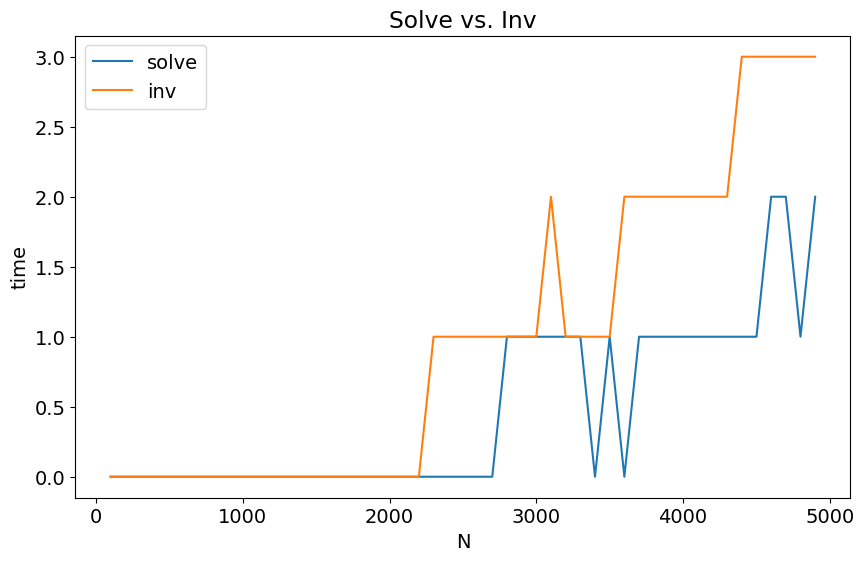

In [27]:
plt.plot(N_vals, times_solve, label='solve')
plt.plot(N_vals, times_inv, label='inv')
plt.legend()
plt.xlabel('N')
plt.ylabel('time')
plt.title('Solve vs. Inv')
plt.show()

## Computing Eigenvalues

The [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html) library also contains a number of useful  functions for calculating eigenvalues and eigenvectors. Most relevantly, the [scipy.linalg.eig](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig) function can be used for computing the eigenvalues and eigenvectors of a general, square matrix.

As a reminder, the eigen-equation is

$
\large
\begin{align}
A \mathbf{X} = \lambda \mathbf{X}
\end{align}
$

where $\lambda$ are the eigenvalues and  $\mathbf{X}$ are the eigenvectors.

In the cell below, compute the eigenvalues and eigenvectors for a 5x5 matrix of random values. Then, confirm that these eigenvectors and eigenvalues satisfy the eigen-equation.

Specifically, check that the following has been satisfied:

$
\large
\begin{align}
A \mathbf{X} - \lambda \mathbf{X} = 0
\end{align}
$

Note, the values should be close, but not exactly zero.

In [33]:
N = 5
a = np.random.random((N, N))
# YOUR CODE HERE
lambdas, evecs = linalg.eig(a)
assert np.allclose(a @ evecs - lambdas * evecs, 0)

### Fun with symmetric matrices

Symmetric matrices (where `x[i,j] == x[j,i]`) with random values have an interesting property where a histogram of all eigenvalues looks like a semi-circle. Let's demonstrate this.

#### Creating a symmetric matrix

A symmetric matrix of random values can be created in the following way:
1. Create an NxN array of random values as we have done previously.
2. Add to that matrix its tranpose. Verify the symmetry of the matrix by checking `(x == x.T).all()`.
3. Next, do some additional normalization to limit the range of the eigenvalues:
   - subtract the mean of the matrix from every value
   - divide all values by $\sqrt{N}$

Below, create the symmetric matrix and calculate its eigenvalues. Use the code below to plot a histogram of the eigenvalues.
```
hist, bins = np.histogram(evals.real, bins=50, density=True)

plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))
plt.show()
```

Start with a value of N~100 and increase (by doubling N) until you get a nice circular shape. Break this activity up into multiple cells to make it easier to follow.

In [41]:
# YOUR CODE HERE
# create the matrix
def create_symmetric_matrix(N):
    a = np.random.random((N, N))
    x = a + a.T
    assert (x == x.T).all()
    return (x - x.mean()) / np.sqrt(N)

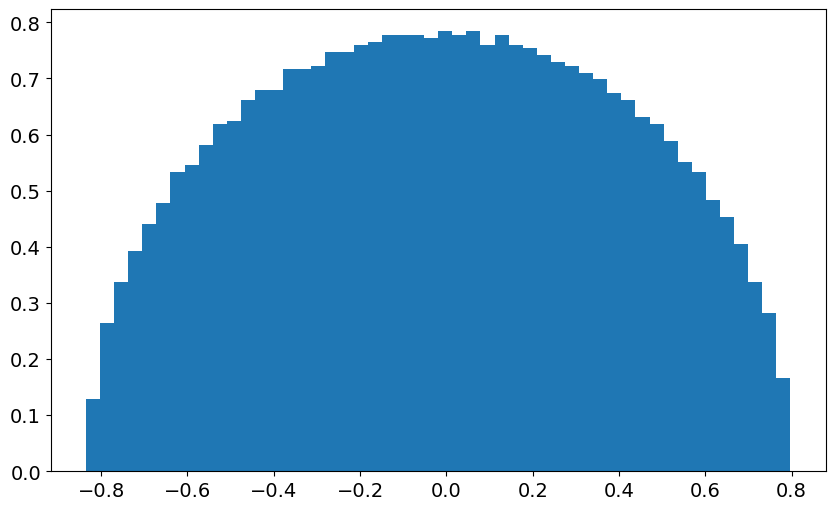

In [50]:
# compute the eigenvalues
N = 500
a = create_symmetric_matrix(N)
evals = linalg.eig(a)[0]

# plot the histogram
hist, bins = np.histogram(evals.real, bins=50, density=True)
plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]))
plt.show()

## Sparse Matrices

Notice how the computation time increases when calculating eigenvalues for larger matrices. The memory usage is also rising (which you can see in the upper right if you are on Noteable). However, sparse matrices are mostly filled with zeros. Hence, they can be stored in various compressed formats to decrease the amount of memory and computation required. The [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) module provides functionality for creating and operating on sparse matrices. In particular, the [scipy.sparse.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg) module provides optimized routines for computations with sparse matrices.

### The Laplace Operator

The continuous Laplace operator, $\mathop{}\!\mathbin\bigtriangleup$, is defined as

$
\Large
\begin{align}
\mathop{}\!\mathbin\bigtriangleup f(x) = \nabla^2 f(x) = \nabla \cdot \nabla f = \frac{\partial^2 f}{\partial x^2}
\end{align}
$

For a set of discreet points, $x$, with separation, $h$, (i.e., x$_n = n h$), the above equation can be discretized as

$
\Large
\begin{align}
\mathop{}\!\mathbin\bigtriangleup f(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}
\end{align}
$

In matrix form, $\mathop{}\!\mathbin\bigtriangleup$ becomes

$
\Large
\begin{align}
\mathop{}\!\mathbin\bigtriangleup = \frac{1}{h^2}
\begin{pmatrix}
-2     &      1 &  0     & \cdots & \cdots & \cdots \\
1      &     -2 &      1 &      0 & \cdots & \cdots \\
0      &      1 &     -2 &      1 &      0 & \cdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots \\
\vdots & \vdots & 0      &      1 &     -2 &      1 \\
\vdots & \vdots & \vdots &      0 &      1 &     -2 \\
\end{pmatrix}
\end{align}
$

In the cell below, use the [diags](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html) function from the SciPy sparse module to create a 5x5 version of the Laplace operator for a value of h=1 and print it.

In [51]:
from scipy import sparse
from scipy.sparse import linalg as splinalg

In [68]:
# YOUR CODE HERE
N = 5
h = 1
a = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray() / h**2
a

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

When you printed your sparse matrix, it most likely did not come out as a full array of values. What you see above is closer to how the computer is storing it in memory to save space. The matrix you create will have a `toarray` method associated with it. Use this to verify that your matrix has been created properly.

In [ ]:
# YOUR CODE HERE
N = 5
h = 1
a = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray() / h**2
a

Now, create the same matrix for N = 1000 (i.e., 1000x1000). Use the [eigsh](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html) function to compute the 10 "smallest algebraic" eigenvalues following the documentation. Compare the lowest of these to the theoretical value of $2 (cos(\frac{\pi N}{N+1}) - 1)$.

In [92]:
# YOUR CODE HERE
N = 1000
h = 1
a = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N))

In [93]:
evals = splinalg.eigsh(a, 10, which='SA')[0]

In [94]:
assert np.allclose(2*(np.cos((np.pi * N) / (N + 1)) - 1), min(evals))

If you are running low on time, move on to the Principal Component Analysis exercise and then come back here later.

## Challenge: springs and springs and springs...

Imagine a system of masses connected by springs. If we take $m$ to be the individual masses and $k$ to be the spring coefficient for the connecting springs, then the equation of motion for the masses in the middle looks like:

$
\Large
\begin{align}
m \frac{d^2 \xi_i}{dt^2} = k (\xi_{i+1} - \xi_i) + k (\xi_{i-1} - \xi_i)
\end{align}
$

where $\xi_{i}$ represents the distance of mass $i$ from its position of rest. The first and last masses are described by:

$
\Large
\begin{align}
m \frac{d^2 \xi_0}{dt^2} = k (\xi_1 - \xi_0) + F_0
\end{align}
$

$
\Large
\begin{align}
m \frac{d^2 \xi_{N-1}}{dt^2} = k (\xi_{N-2} - \xi_{N-1}) + F_{N-1}
\end{align}
$

Here, $F_0$ and $F_{N-1}$ are external forces applied to the left and right masses.

Suppose we set the force on the right side to 0 and apply a sinusoidal force on the left mass that can be described by the real component of:

$
\Large
\begin{align}
F_0 = C e^{i \omega t}
\end{align}
$

The result is that all masses will oscillate with a constant frequency, $\omega$, but with an amplitude, $x_i$, that will vary for each mass such that the solution is:

$
\Large
\begin{align}
\xi_i(t) = x_i(t) e^{i \omega t}
\end{align}
$

This yields the following system of equations:

$
\Large
\begin{align}
-m \omega^2 x_0 = k (x_1 - x_0) + C
\end{align}
$

$
\Large
\begin{align}
-m \omega^2 x_i = k (x_{i-1} - x_{i}) + k (x_{i-1} - x_i)
\end{align}
$

$
\Large
\begin{align}
-m \omega^2 x_{N-1} = k (x_{N-2} - x_{N-1})
\end{align}
$

If we then make the following substitution, $\alpha = 2k - m \omega^2$, the system of equations reduces to:

$
\Large
\begin{align}
(\alpha - k) x_0 - k x_1 = C
\end{align}
$

$
\Large
\begin{align}
\alpha x_i - k x_{i-1} - k x_{i+1} = 0
\end{align}
$

$
\Large
\begin{align}
(\alpha - k) x_{N-1} - k x_{N-2} = 0
\end{align}
$

Using the values defined below for the constants, express the above system of equations in matrix form. Then, solve the system for $x$ and make a plot $x$ vs. $i$.

**Bonus challenge:** increase N to something much larger and try solving for $x$ with a more efficient method (maybe something from the sparse module or another specialized solver function). Can you find a method that scales better than a conventional solve?

In [83]:
m = 1 # mass
k = 6 # spring constant
w = 2 # oscillator frequency
a = 2*k - m*w**2
C = 1 # forcing amplitude

N = 100

In [86]:
# YOUR CODE HERE
# create matrix
A = sparse.diags([-k, a, -k], [-1, 0, 1], shape=(N, N)).toarray()
A[0,:2] = np.array([a-k, -k])
A[-1,-2:] = np.array([-k, a-k])

b = np.zeros(N)
b[0] = C

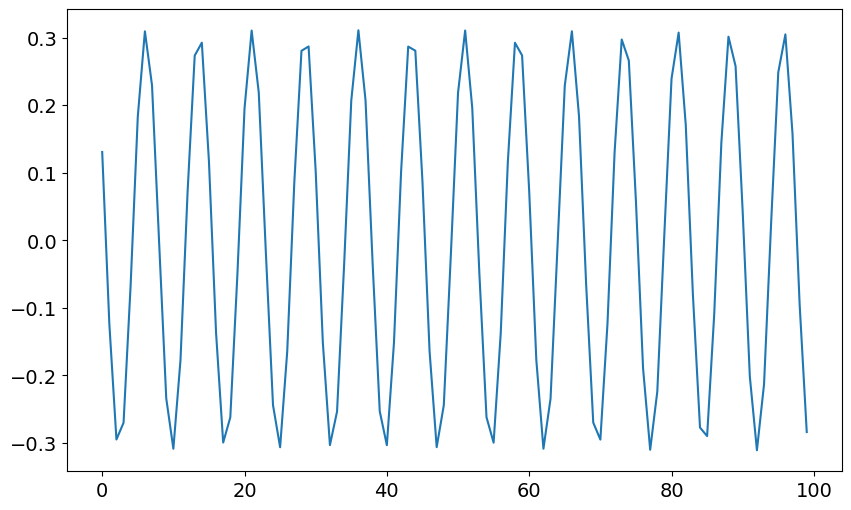

In [88]:
# compute the value for x
x = linalg.solve(A, b)
# plot the result
plt.plot(x)
plt.show()

## Principal Component Analysis

In the following example, we will demonstrate the principles of Principal Component Analysis.

We will begin by generating a 2D multivariate normal distribution and rotating it by a fixed angle. This will represent a data set consisting of N pairs of correlated values.

We will first plot the data to show that the x and y values appear correlated. **Note, we use a slightly different plotting method that allows one to customize the axes.**

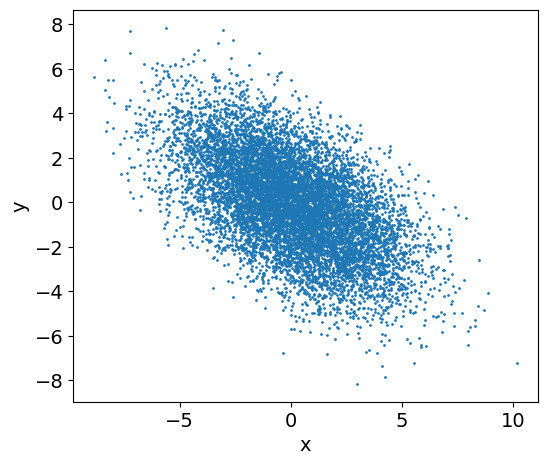

In [95]:
### Generate the data
N = 10000
porig = np.array([np.random.normal(loc=0, scale=3,   size=N),  # x values
                  np.random.normal(loc=0, scale=1.5, size=N)]) # y values

theta = -np.pi / 5
rot = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]])
p = rot @ porig

### Plot the data
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.set_aspect('equal')
ax.scatter(p[0], p[1], s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Use the process described in the lecture to compute the principal components and transform the data into a coordinate system where the values are uncorrelated. Compute the standard deviations for each dimension of the transformed data and compare them to the values used to generate the original data. Tip: the `np.std` function takes an `axis` keyword argument (as do many numpy functions).

Bonus challenge: overplot arrows describing the principal component vectors as done in the lecture for both the correlated and transformed, uncorrelated data. The following code can be used to plot arrows:

```
kwargs = dict(head_width=0.5, head_length=0.5, length_includes_head=True, fc='k', ec='k')
ax.arrow(0, 0, vx, vy, **kwargs)
```
where `vx` and `vy` are the x and y components of the vector.

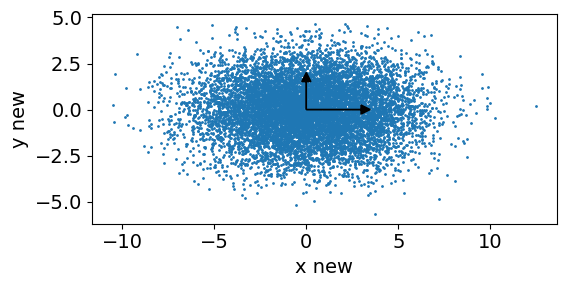

In [118]:
# YOUR CODE HERE
cov = np.cov(p)
l, v = linalg.eig(cov)
p_new = v.T @ p
v = np.sqrt(l.real) * v

l_new, v_new = linalg.eig(np.cov(p_new))
v_new = np.sqrt(l_new.real) * v_new

### Plot the data
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.set_aspect('equal')
ax.scatter(p_new[0], p_new[1], s=1)
ax.set_xlabel('x new')
ax.set_ylabel('y new')
kwargs = {'head_width': 0.5, 'head_length': 0.5, 'fc': 'black', 'ec': 'black'}
ax.arrow(0, 0, v_new[0, 0], v_new[1, 0], **kwargs)
ax.arrow(0, 0, v_new[0, 1], v_new[1, 1], **kwargs)
plt.show()